In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import os
%matplotlib inline

## Select your Keras backend by uncommenting the correct line

In [2]:
os.environ["KERAS_BACKEND"] =  "plaidml.keras.backend"
#os.environ["KERAS_BACKEND"] =  "tensorflow"
#os.environ["KERAS_BACKEND"] =  "cntk"
from unet_nuclei import *

Using plaidml.keras.backend backend.


In [3]:
folder = "testimages"
files = os.listdir(folder)

In [4]:
files = [os.path.join(folder,f) for f in files]
files

['testimages\\EMBO_course_2012_Plate_son_batch05_01--empty--empty--W0025--P001--T00000--Z000--C01.ome.tif',
 'testimages\\EMBO_course_2012_Plate_son_batch05_01--s2748--CDC20--W0084--P001--T00000--Z000--C01.ome.tif',
 'testimages\\EMBO_course_2012_Plate_son_batch05_01--s449--PLK1--W0008--P001--T00000--Z000--C01.ome.tif',
 'testimages\\EMBO_course_2012_Plate_son_batch05_01--s449--PLK1--W0081--P001--T00000--Z000--C01.ome.tif']

Initialize the model. Note that we set `automated_shape_adjustment=True`, which initializes the model with the closest compatible shape to the desired input shape. 

In [5]:
model = unet_initialize((1024,1024), automated_shape_adjustment=True)

# if you are trying this without GPU (e.g. with a tensorflow build for CPU)
# set this to a smaller size
# model = unet_initialize((128,128), automated_shape_adjustment=True)

INFO:plaidml:Opening device "opencl_intel_intel(r)_uhd_graphics_620.0"


Check which size was actually chosen:

In [6]:
# model shape
model.input_shape

(None, 1024, 1024, 1)

Define a function to process an image. Beware of the hard coded crop on loading ... Again this is simply to demonstrate the automated rescaling of the image to the model and of the classification result to the image shape.

In [7]:
def process_img(im):
    im = imread(im)[:1024,:1024]
    plt.imshow(im)
    plt.show()
    prediction = unet_classify(model, im)
    plt.imshow(prediction)
    plt.show()

testimages\EMBO_course_2012_Plate_son_batch05_01--empty--empty--W0025--P001--T00000--Z000--C01.ome.tif


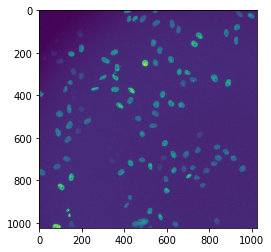

INFO:plaidml:Analyzing Ops: 99 of 291 operations complete
INFO:plaidml:Analyzing Ops: 187 of 291 operations complete
INFO:plaidml:Analyzing Ops: 265 of 291 operations complete


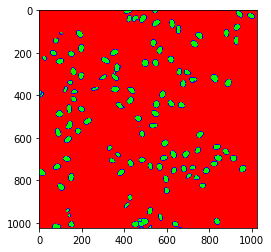

testimages\EMBO_course_2012_Plate_son_batch05_01--s2748--CDC20--W0084--P001--T00000--Z000--C01.ome.tif


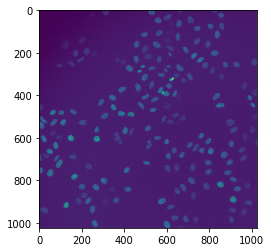

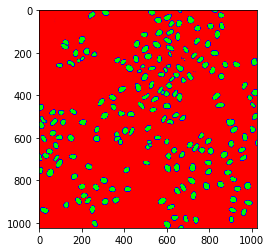

testimages\EMBO_course_2012_Plate_son_batch05_01--s449--PLK1--W0008--P001--T00000--Z000--C01.ome.tif


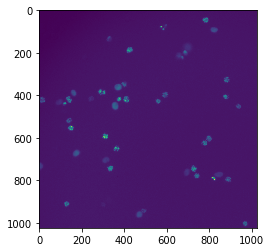

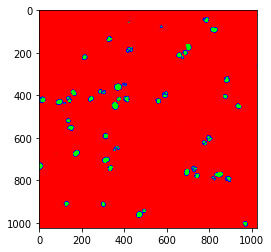

testimages\EMBO_course_2012_Plate_son_batch05_01--s449--PLK1--W0081--P001--T00000--Z000--C01.ome.tif


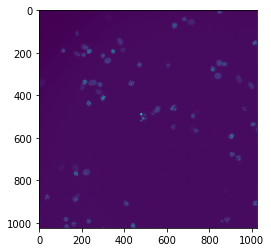

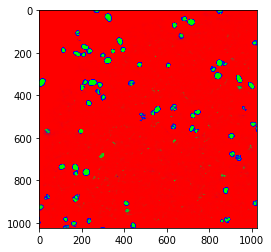

In [8]:
# note that the first file takes longer
for f in files:
    print(f)
    process_img(f)

### Resulting probability map
3-channel image, red channel is background class, blue channel is nuclear boundary mask and green channel is nuclei mask
